# Dataset Information

Dream housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that comapny validates the customer eligibility for loan. Company wnats to automate the loan eligibility process (real time) based on customers detail provided while filing online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income,Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

# Import moudules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

df stands for dataframe

In [21]:
df = pd.read_csv('loan_prediction_anal-dataset1.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# One Hot encoding 

In [23]:
#lets see how many columns we will obtain afetr one hot encoding 
pd.get_dummies(df, drop_first = True).shape

(614, 628)

In [11]:
# todisplay stats about dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [59]:
#basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

In [60]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
#fill the missing value for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [62]:
#fill the missing value for categorical terms - mode

#df['Gender'].mode()
#df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [63]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [64]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: xlabel='Dependents', ylabel='count'>

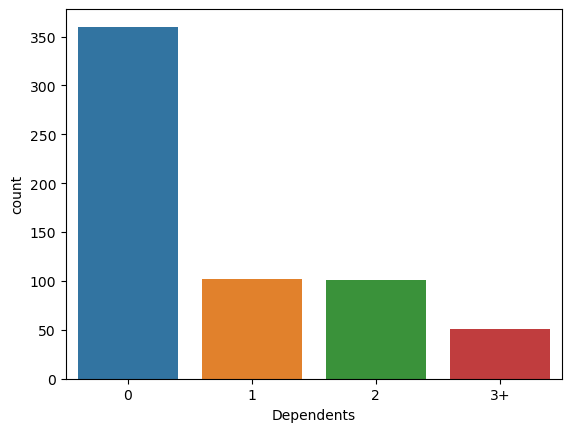

In [65]:
# categorical attribute visualization
sns.countplot(x = 'Dependents', data= df)

<Axes: xlabel='Gender', ylabel='count'>

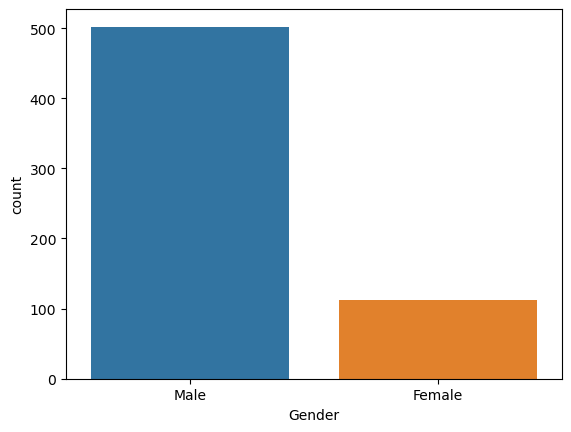

In [66]:
sns.countplot(x = 'Gender', data= df)

<Axes: xlabel='Married', ylabel='count'>

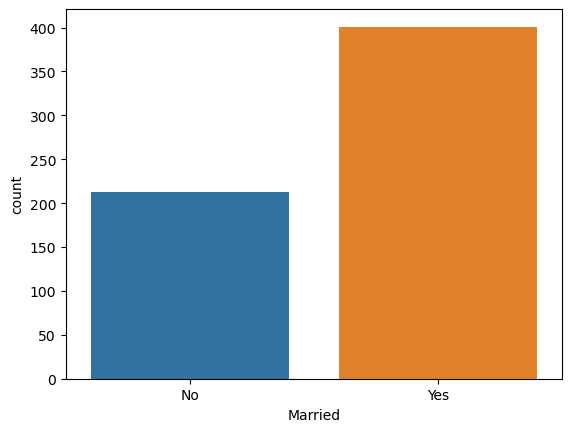

In [67]:
sns.countplot(x = 'Married', data= df)

<Axes: xlabel='Self_Employed', ylabel='count'>

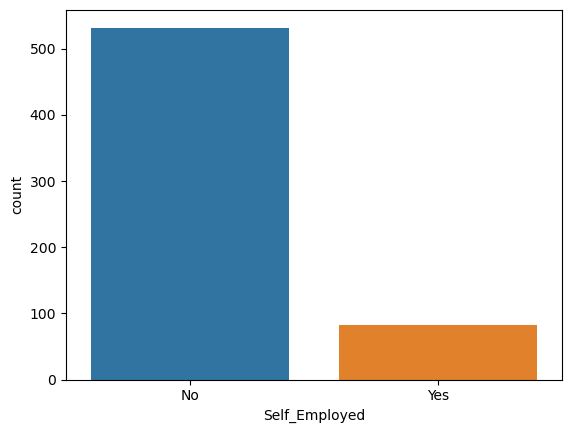

In [68]:
sns.countplot(x = 'Self_Employed', data= df)

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\3841752337.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

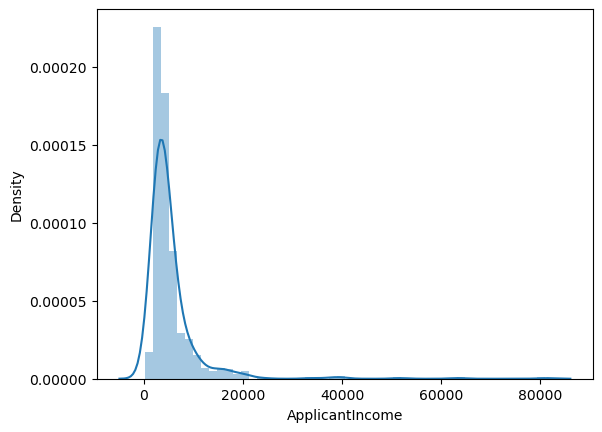

In [69]:
# NUmerical attributes visualization
sns.distplot(df['ApplicantIncome'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\1902152647.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

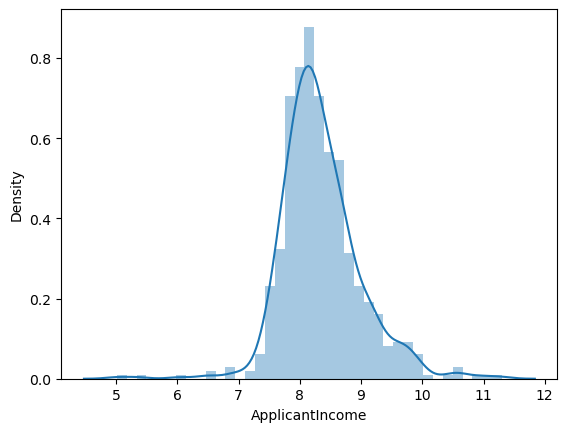

In [70]:
# this is done to make the graph in normalize form
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\2149142820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

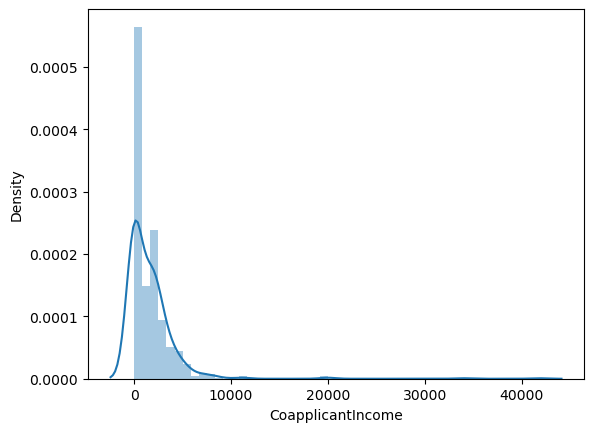

In [71]:
sns.distplot(df['CoapplicantIncome'])

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_10748\4136864440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

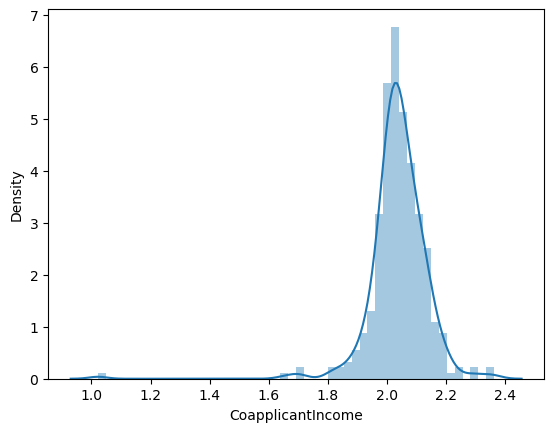

In [73]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncome'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\413488336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

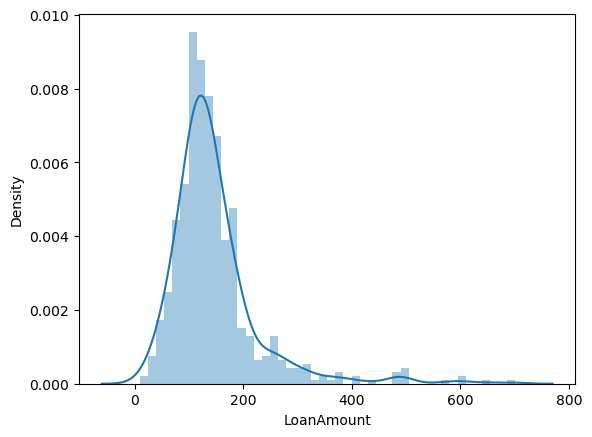

In [74]:
sns.distplot(df['LoanAmount'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\1997489442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

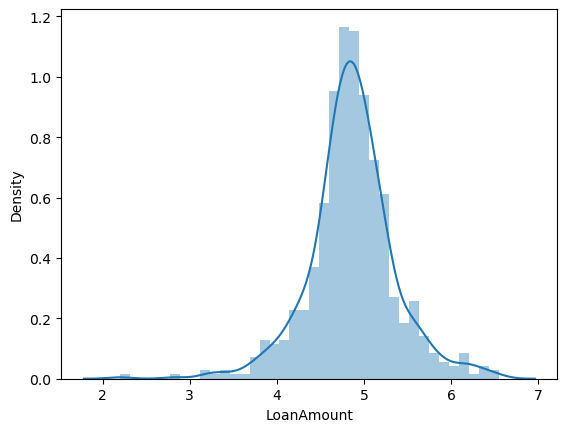

In [75]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\710718432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

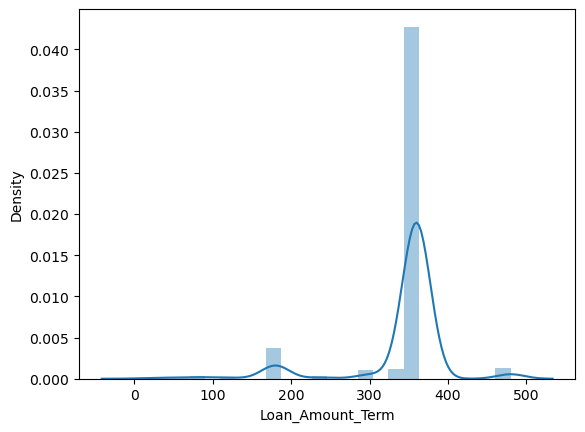

In [76]:
sns.distplot(df['Loan_Amount_Term'])

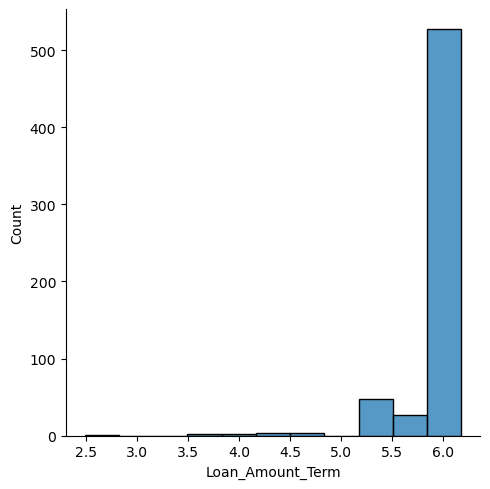

In [77]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_Term'])

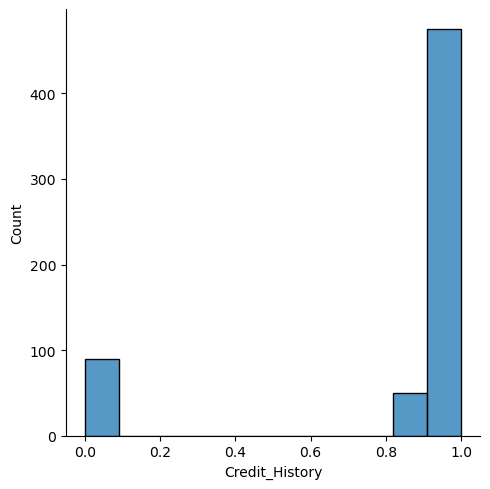

In [78]:
sns.displot(df['Credit_History'])

In [79]:
# df['Credit_History'] = np.log(df['Credit_History'])
# sns.distplot(df['Credit_History'])

# Creating new attribute


In [80]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,NaN,4.986426,5.886104,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1.990411,4.852030,5.886104,1.0,Rural,N,10.420520
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,NaN,4.189655,5.886104,1.0,Urban,Y,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2.049700,4.787492,5.886104,1.0,Urban,Y,9.906407
4,LP001008,Male,No,0,Graduate,No,8.699515,NaN,4.948760,5.886104,1.0,Urban,Y,NaN


# Log Transformation

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\3021680648.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncomeLog'])


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

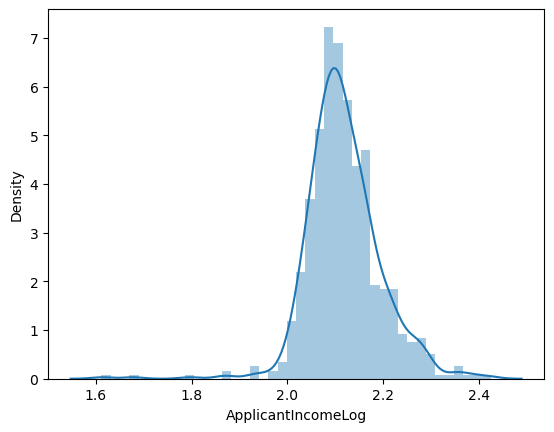

In [81]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\4266061796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncomeLog'])


<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

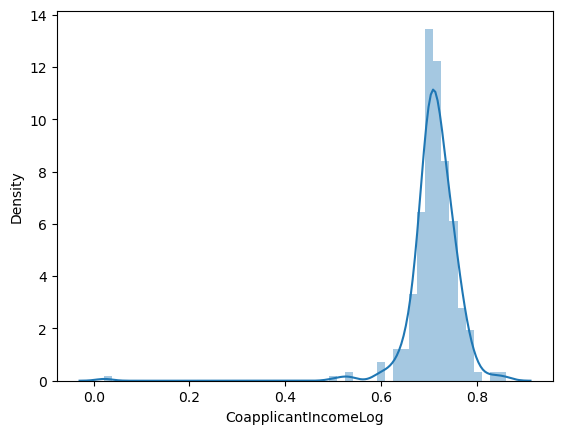

In [82]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncomeLog'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\3068120744.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmountLog'])


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

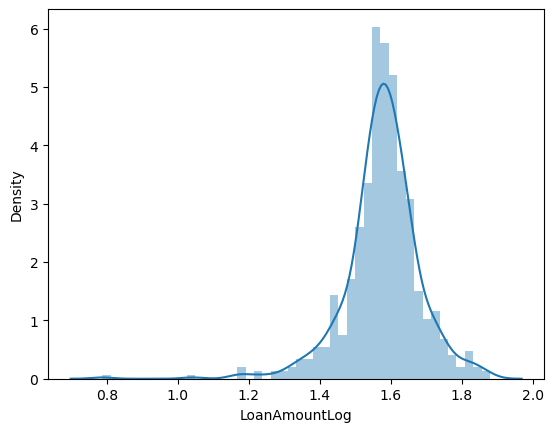

In [83]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

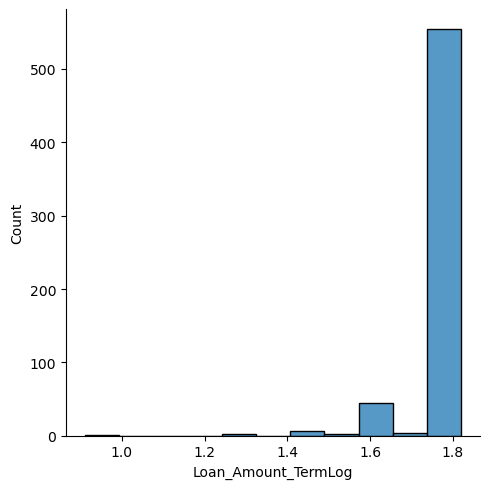

In [84]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_TermLog'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\4151780318.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_IncomeLog'])


<Axes: xlabel='Total_IncomeLog', ylabel='Density'>

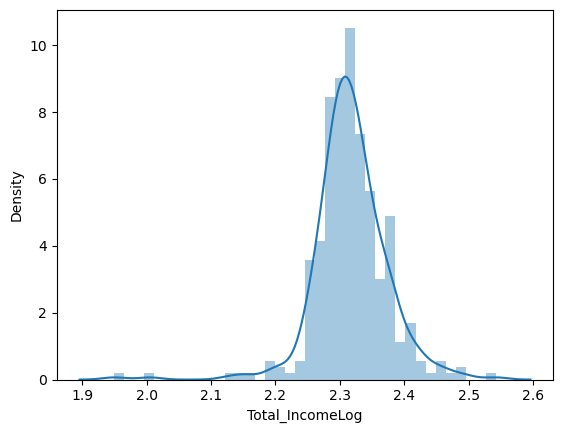

In [85]:
df['Total_IncomeLog'] = np.log(df['Total_Income'])
sns.distplot(df['Total_IncomeLog'])

# Coorelation Matrix

In [86]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
ApplicantIncome,1.000000,0.021921,0.491066,-0.014618,0.019169,0.984881,0.995073,0.020851,0.457364,-0.011363,0.983171
CoapplicantIncome,0.021921,1.000000,0.356187,-0.047641,-0.066682,0.194783,0.007448,0.987790,0.341509,-0.042391,0.184576
LoanAmount,0.491066,0.356187,1.000000,0.084534,-0.025248,0.487837,0.470499,0.319904,0.991400,0.079119,0.469820
Loan_Amount_Term,-0.014618,-0.047641,0.084534,1.000000,-0.007860,-0.012470,-0.014628,-0.042183,0.093398,0.991121,-0.013730
Credit_History,0.019169,-0.066682,-0.025248,-0.007860,1.000000,0.012011,0.017560,-0.065477,-0.031382,-0.010274,0.006496
Total_Income,0.984881,0.194783,0.487837,-0.012470,0.012011,1.000000,0.976653,0.191617,0.467013,-0.015216,0.996554
ApplicantIncomeLog,0.995073,0.007448,0.470499,-0.014628,0.017560,0.976653,1.000000,0.008080,0.439664,-0.011825,0.983821
CoapplicantIncomeLog,0.020851,0.987790,0.319904,-0.042183,-0.065477,0.191617,0.008080,1.000000,0.307215,-0.037706,0.183410
LoanAmountLog,0.457364,0.341509,0.991400,0.093398,-0.031382,0.467013,0.439664,0.307215,1.000000,0.086556,0.450983
Loan_Amount_TermLog,-0.011363,-0.042391,0.079119,0.991121,-0.010274,-0.015216,-0.011825,-0.037706,0.086556,1.000000,-0.016466


C:\Users\HP\AppData\Local\Temp\ipykernel_10748\1853666307.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

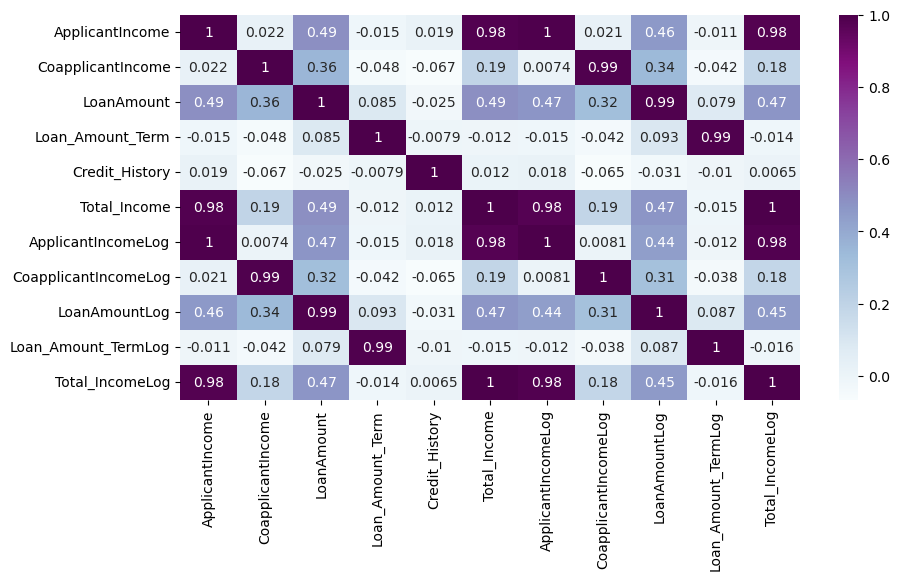

In [87]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [88]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,LP001002,Male,No,0,Graduate,No,8.674026,NaN,4.986426,5.886104,1.0,Urban,Y,NaN,2.160333,NaN,1.606719,1.772594,NaN
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1.990411,4.852030,5.886104,1.0,Rural,N,10.420520,2.131810,0.688341,1.579397,1.772594,2.343777
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,NaN,4.189655,5.886104,1.0,Urban,Y,NaN,2.080237,NaN,1.432618,1.772594,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2.049700,4.787492,5.886104,1.0,Urban,Y,9.906407,2.061368,0.717693,1.566007,1.772594,2.293182
4,LP001008,Male,No,0,Graduate,No,8.699515,NaN,4.948760,5.886104,1.0,Urban,Y,NaN,2.163267,NaN,1.599137,1.772594,NaN


In [89]:
#drop unneccessary column
cols = ['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term', 'LoanAmount','Credit_History','Total_Income','Loan_ID','CoapplicantIncomeLog','Total_IncomeLog','LoanAmountLog','Loan_Amount_TermLog','ApplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


# Label Encoding
 technique used in machine learning and data analysis to convert categorical variables into numerical format

In [90]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col]= le.fit_transform(df[col])

In [91]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


# Train-Test Split

In [92]:
#specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis= 1)
y = df['Loan_Status']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

# Model Training

In [100]:
#classify fucntion
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25,random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy is: ',model.score(x_test, y_test)*100)
    # Cross validation - It is used for better validation of model
    # eg- cv =5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is: ",np.mean(score)*100)

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy is:  64.93506493506493
Cross validation is:  68.72984139677463


In [102]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy is:  65.5844155844156
Cross validation is:  65.96028255364521


In [103]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x,y)

Accuracy is:  64.28571428571429
Cross validation is:  65.31387445021991


In [104]:
model = ExtraTreesClassifier()
classify(model, x,y)

Accuracy is:  65.5844155844156
Cross validation is:  65.95761695321872


# Hyperparameter tuning

Hyperparameter tuning allows data scientists to tweak model performance for optimal results. This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success.

In [105]:
model = RandomForestClassifier(n_estimators = 25, min_samples_split=25,max_depth=7, max_features=1)
classify(model, x, y)

Accuracy is:  64.93506493506493
Cross validation is:  68.56723977075838


In [106]:
model = RandomForestClassifier(n_estimators = 50, min_samples_split=25,max_depth=7, max_features=1)
classify(model, x, y)

Accuracy is:  64.93506493506493
Cross validation is:  68.40463814474211


In [107]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split=25,max_depth=7, max_features=1)
classify(model, x, y)

Accuracy is:  64.93506493506493
Cross validation is:  67.75156604025057


# Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [108]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[12, 42],
       [11, 89]], dtype=int64)

<Axes: >

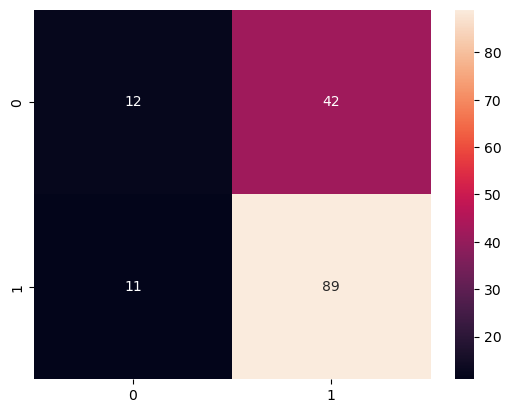

In [115]:
sns.heatmap(cm, annot= True)